# Виды распределений

Загрузить таблицу и построить график распределений. Найти нормальное распределение.

In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица цен на дома в Бостоне

Основные значения:

* CRIM: This is the per capita crime rate by town
* ZN: This is the proportion of residential land zoned for lots larger than 25,000 sq.ft.
* INDUS: This is the proportion of non-retail business acres per town.
* CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
* NOX: This is the nitric oxides concentration (parts per 10 million)
* RM: This is the average number of rooms per dwelling
* AGE: This is the proportion of owner-occupied units built prior to 1940
* DIS: This is the weighted distances to five Boston employment centers
* RAD: This is the index of accessibility to radial highways
* TAX: This is the full-value property-tax rate per 10,000 dollars
* PTRATIO: This is the pupil-teacher ratio by town
* B: This is calculated as 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
* LSTAT: This is the percentage lower status of the population
* MEDV: This is the median value of owner-occupied homes in 1000 dollars

In [2]:
url='http://yustiks.ru/housing.csv'
s=requests.get(url).content
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data=pd.read_csv(io.StringIO(s.decode('utf-8')),  delim_whitespace=True, names=names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Нарисовать частотные графики для всех значений. Можете ли вы найти следующие распределения в данных графиках?


1.   Нормальное
2.   Равномерное
3.   Биноминальное
4.   Бернулли
5.   Геометрическое
6.   Логнормальное



In [3]:
for col in data.columns:
    print('column: ', col, ' | number of values: ', len(data[col]), ' | unique values: ', len(set(data[col])))

column:  CRIM  | number of values:  506  | unique values:  504
column:  ZN  | number of values:  506  | unique values:  26
column:  INDUS  | number of values:  506  | unique values:  76
column:  CHAS  | number of values:  506  | unique values:  2
column:  NOX  | number of values:  506  | unique values:  81
column:  RM  | number of values:  506  | unique values:  446
column:  AGE  | number of values:  506  | unique values:  356
column:  DIS  | number of values:  506  | unique values:  412
column:  RAD  | number of values:  506  | unique values:  9
column:  TAX  | number of values:  506  | unique values:  66
column:  PTRATIO  | number of values:  506  | unique values:  46
column:  B  | number of values:  506  | unique values:  357
column:  LSTAT  | number of values:  506  | unique values:  455
column:  MEDV  | number of values:  506  | unique values:  229


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


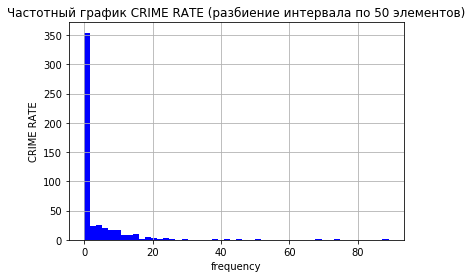

In [6]:
#n, bins, patches = 
plt.hist(data['CRIM'].dropna(), bins=50, facecolor='b')
plt.xlabel('frequency')
plt.ylabel('CRIME RATE')
plt.title('Частотный график CRIME RATE (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [7]:
# Данное распределение похоже на логнормальное

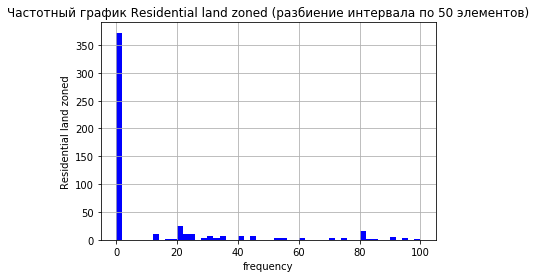

In [8]:
#n, bins, patches = 
plt.hist(data['ZN'].dropna(), bins=50, facecolor='b')
plt.xlabel('frequency')
plt.ylabel('Residential land zoned')
plt.title('Частотный график Residential land zoned (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [9]:
# Данное распределение похоже на дискретное, по графику однозначно нельзя отнести к одному из известных видов распределений

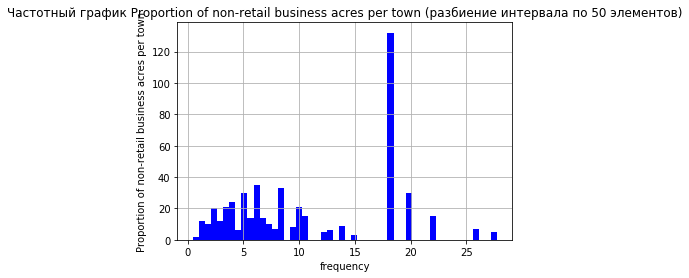

In [10]:
#n, bins, patches = 
plt.hist(data['INDUS'].dropna(), bins=50, facecolor='b')
plt.xlabel('frequency')
plt.ylabel('Proportion of non-retail business acres per town')
plt.title('Частотный график Proportion of non-retail business acres per town (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [11]:
# Данное распределение похоже на дискретное мультимодальное распределение

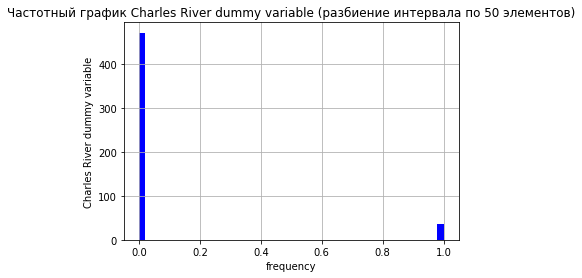

In [12]:
#n, bins, patches = 
plt.hist(data['CHAS'].dropna(), bins=50, facecolor='b')
plt.xlabel('frequency')
plt.ylabel('Charles River dummy variable')
plt.title('Частотный график Charles River dummy variable (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [13]:
# Это распределение Бернулли

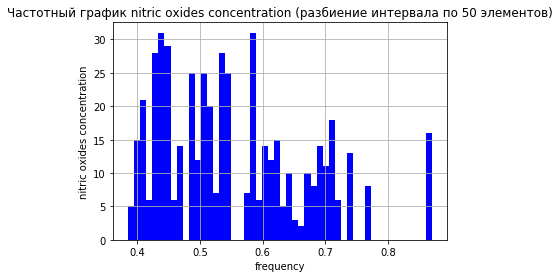

In [14]:
#n, bins, patches = 
plt.hist(data['NOX'].dropna(), bins=50, facecolor='b')
plt.xlabel('frequency')
plt.ylabel('nitric oxides concentration')
plt.title('Частотный график nitric oxides concentration (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [15]:
# Это распределение похоже на дискретное

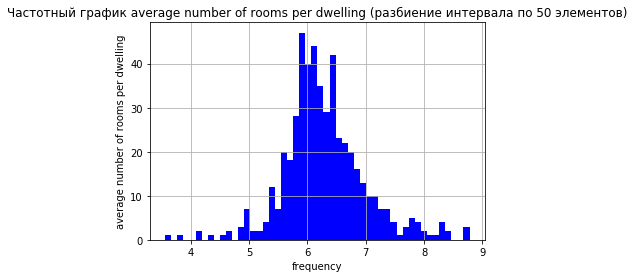

In [16]:
#n, bins, patches = 
plt.hist(data['RM'].dropna(), bins=50, facecolor='b')
plt.xlabel('frequency')
plt.ylabel('average number of rooms per dwelling')
plt.title('Частотный график average number of rooms per dwelling (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [17]:
# Это распределение похоже на нормальное

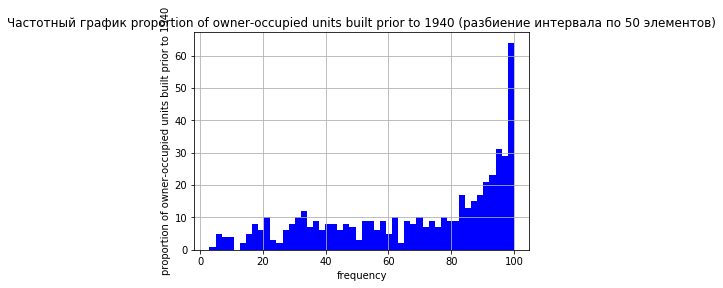

In [18]:
#n, bins, patches = 
plt.hist(data['AGE'].dropna(), bins=50, facecolor='b')
plt.xlabel('frequency')
plt.ylabel('proportion of owner-occupied units built prior to 1940')
plt.title('Частотный график proportion of owner-occupied units built prior to 1940 (разбиение интервала по 50 элементов)')
plt.grid(True)
plt.show()

In [19]:
# Это похоже на сильно скошенное Бета-распределение

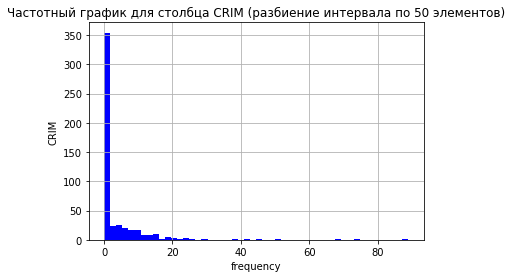

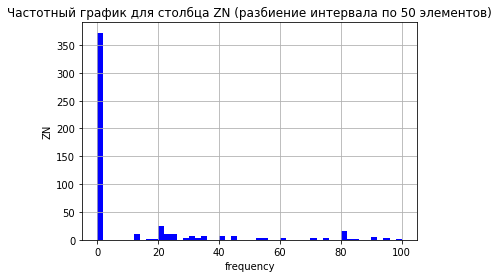

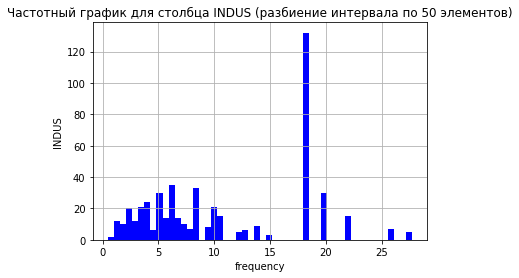

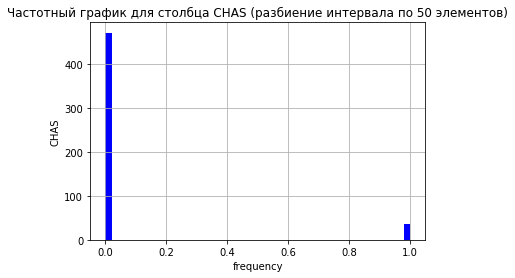

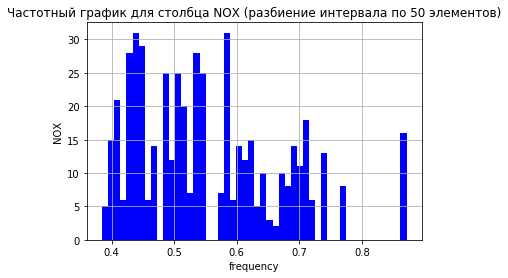

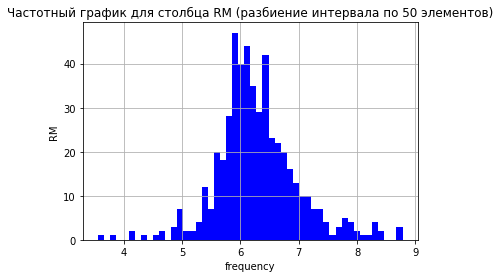

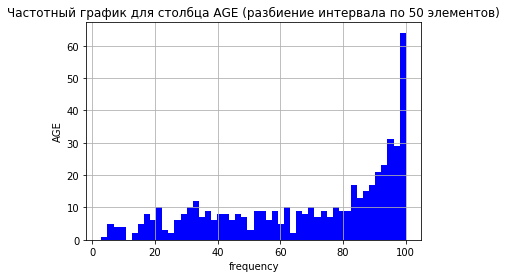

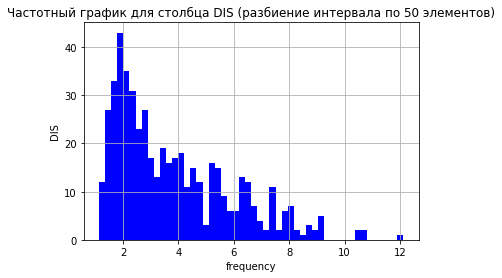

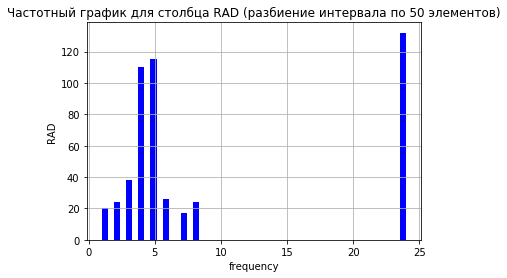

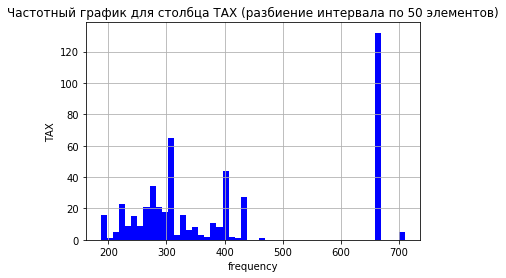

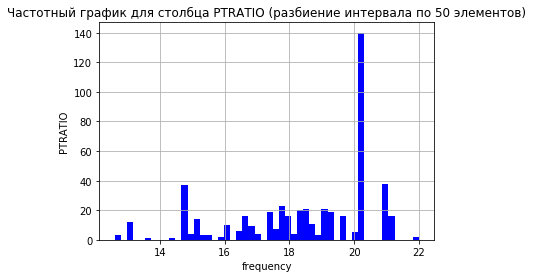

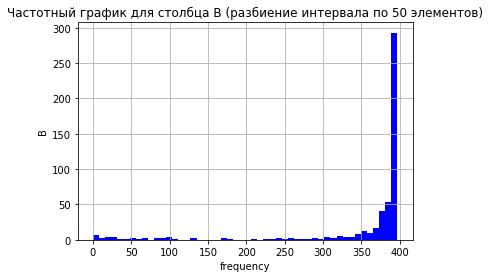

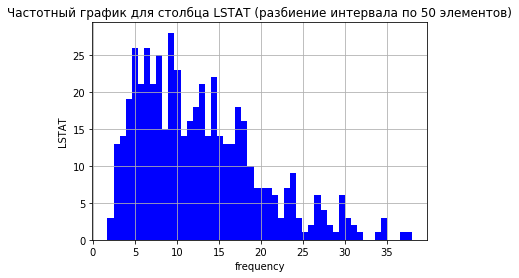

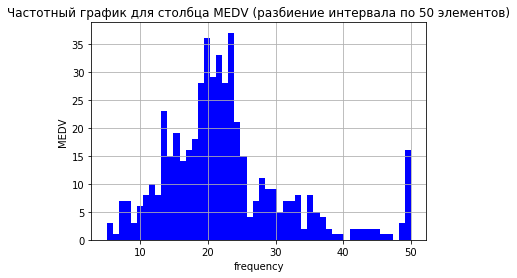

In [20]:
for column in data.columns:
    #n, bins, patches = 
    plt.hist(data[column].dropna(), bins=50, facecolor='b')
    plt.xlabel('frequency')
    plt.ylabel(column)
    plt.title('Частотный график для столбца {} (разбиение интервала по 50 элементов)'.format(column))
    plt.grid(True)
    plt.show()

In [21]:
# DIS: 'это распределение похоже на логнормальное'
""" 
RAD: это дискретное распределение, возможно, мультимодальное, одно из распределений похоже на гипергеометрическое
TAX: похоже на мультимодальное распределение, точнее сложно определить
PTRATIO: по сути параметра - должно быть непрерывное распределение, но из-за огранченного количества значений можжно трактовать его как дискретное
B: похоже на непрерывное распределение, возможно, бета-распределение
LSTAT: похоже на непрерывное распределение, хи-квадрат или гамма или логнормальное
MEDV: похоже на нормальное распределение
"""
print()

In [22]:
# Напишите код, который будет рисовать распределения попарно - точечные распределение
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

In [23]:
df.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [24]:
columns = df.columns
print(columns[1:])

Index(['Ladder', 'SD of Ladder', 'Positive affect', 'Negative affect',
       'Social support', 'Freedom', 'Corruption', 'Generosity',
       'Log of GDP\nper capita', 'Healthy life\nexpectancy'],
      dtype='object')


C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


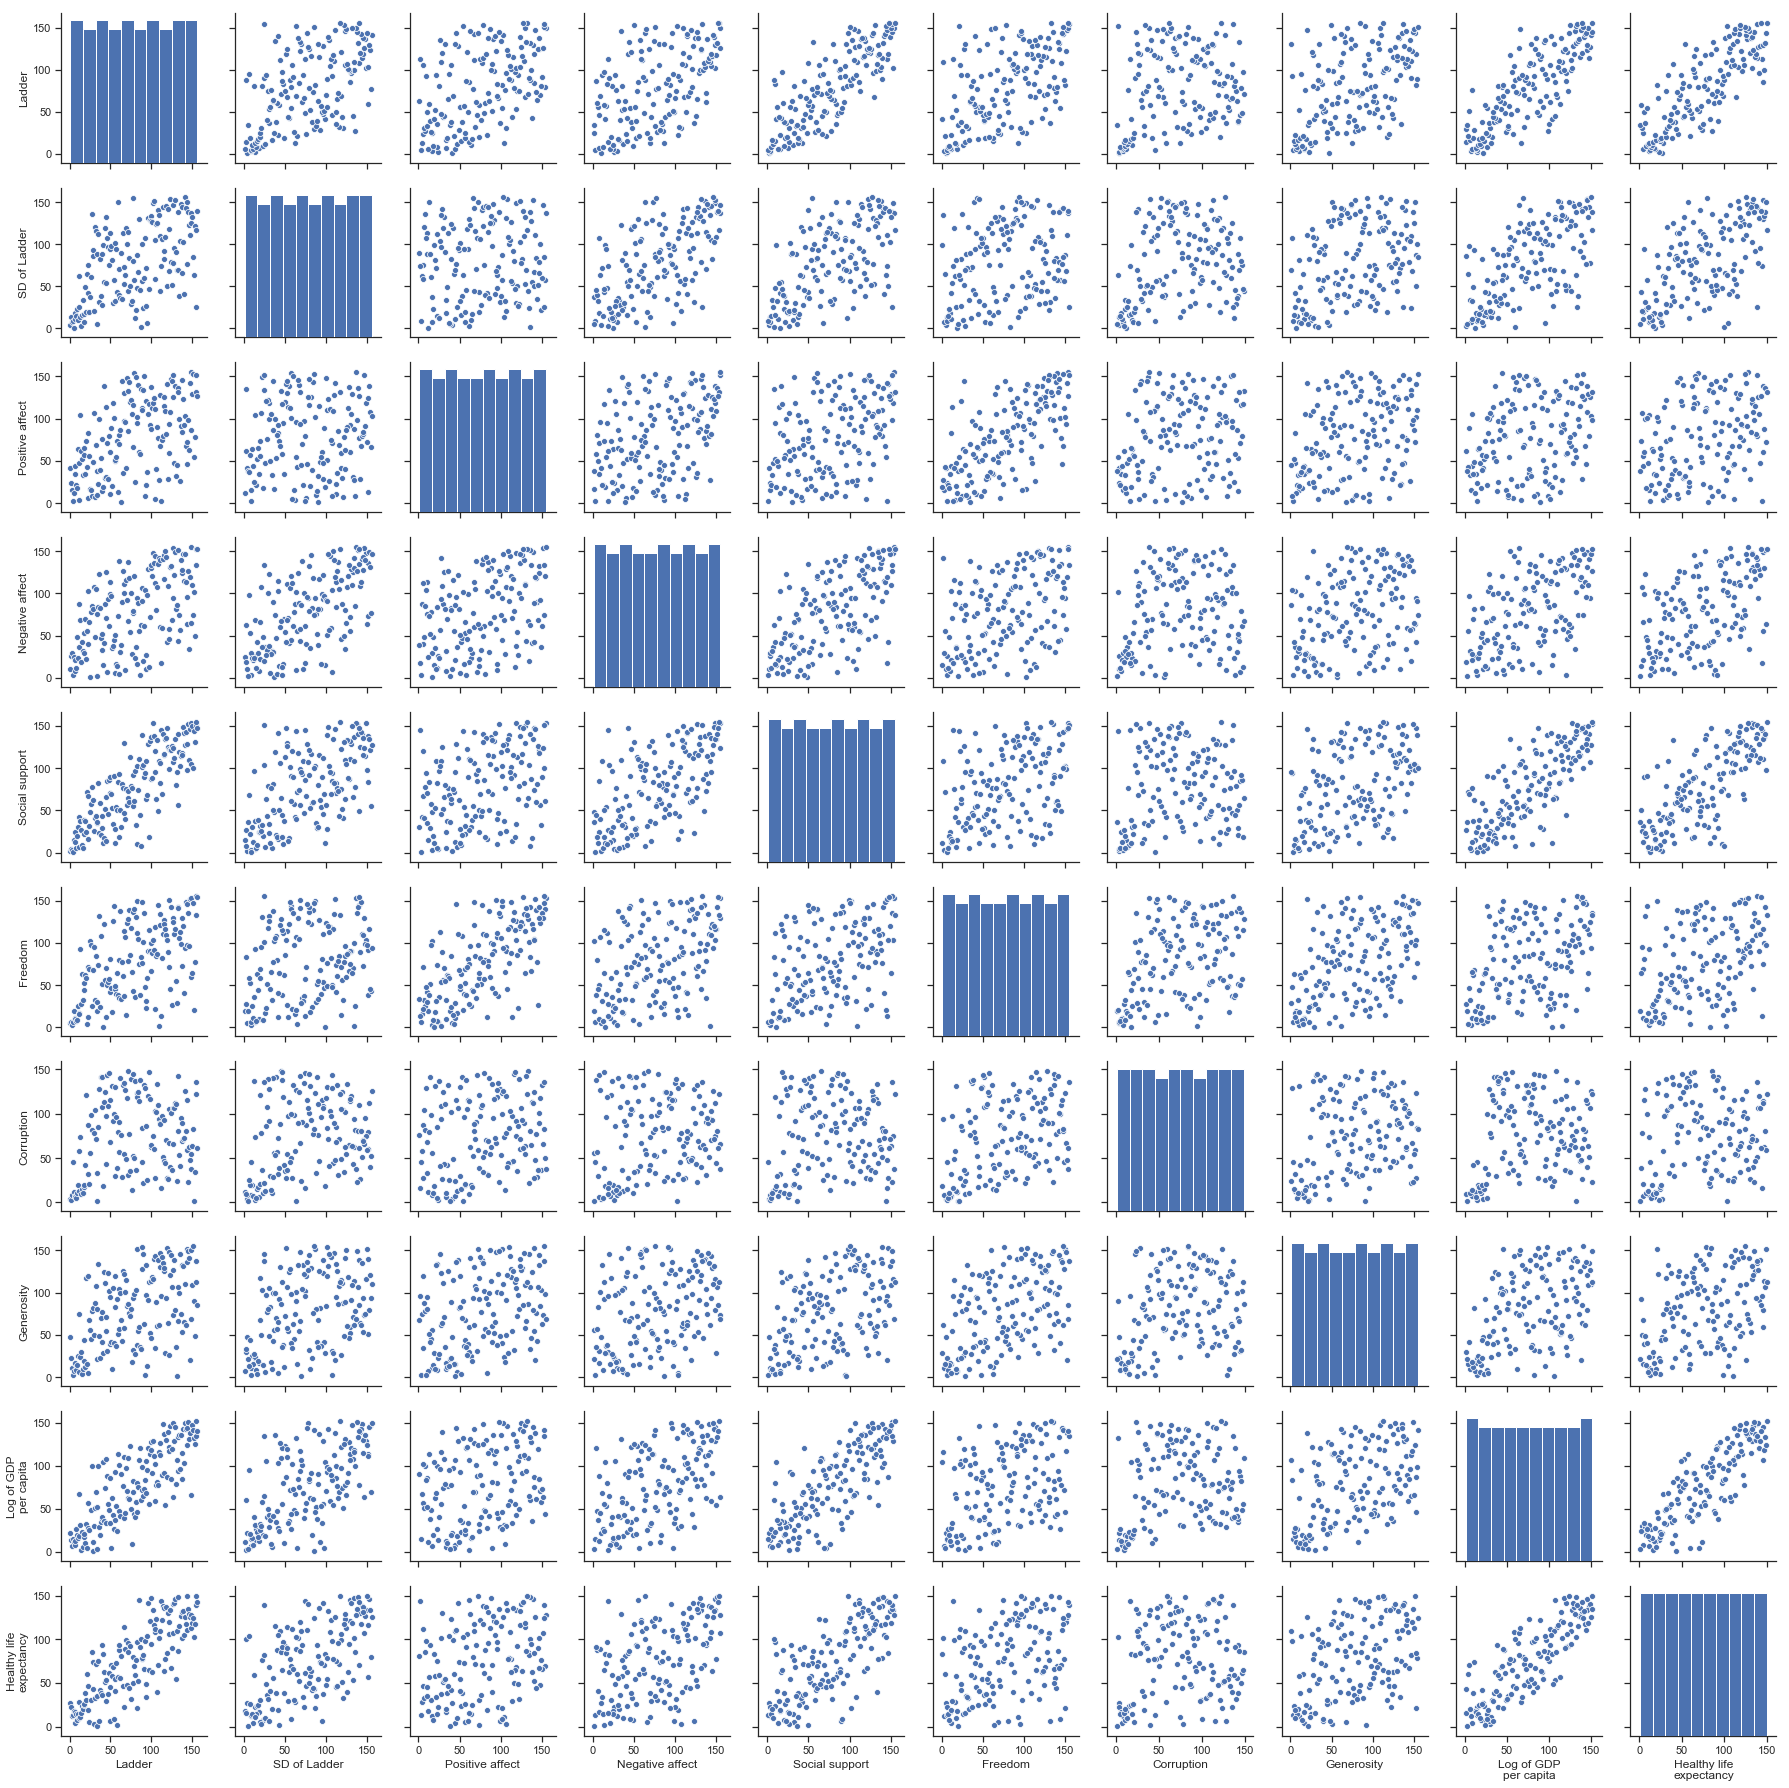

In [25]:
sns.set(style='ticks', color_codes=True)
g=sns.pairplot(df[columns[1:]])

Загрузить таблицу Happiness report. Нарисовать матрицу ковариаций попарно. 

In [26]:
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
data=pd.read_csv(url)
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [27]:
X = df[columns[1:]].dropna()

In [28]:
cov_matrix = np.cov(X.T)
cov_matrix

array([[2088.55066804, 1171.89280576, 1037.04069887, 1097.68016444,
        1745.00719424, 1126.43720452,  437.43597122,  992.82230216,
        1625.96176773, 1661.55015416],
       [1171.89280576, 2127.17014388,  184.69568345, 1298.79928058,
        1268.0323741 ,  520.63165468,  498.41654676,  796.97446043,
        1327.72014388, 1293.22194245],
       [1037.04069887,  184.69568345, 1965.29311408,  694.32127441,
         880.13669065, 1392.96279548,  427.18848921,  826.97194245,
         597.45693731,  661.01243577],
       [1097.68016444, 1298.79928058,  694.32127441, 1980.79527235,
        1369.01438849,  835.04152107,  316.04028777,  697.80791367,
        1091.69558068,  992.67965057],
       [1745.00719424, 1268.0323741 ,  880.13669065, 1369.01438849,
        2099.08633094,  989.15107914,  290.97841727,  918.33453237,
        1592.89208633, 1521.89568345],
       [1126.43720452,  520.63165468, 1392.96279548,  835.04152107,
         989.15107914, 2034.81932169,  784.23597122, 1005

In [29]:
standardized = (X - X.mean()) / X.std()

In [30]:
np.cov(standardized.T)

array([[1.        , 0.55598652, 0.51186994, 0.53967651, 0.83341164,
        0.54641367, 0.22439426, 0.48570397, 0.82060756, 0.82667749],
       [0.55598652, 1.        , 0.09033207, 0.63273394, 0.6000868 ,
        0.25024565, 0.25334428, 0.38633667, 0.66397713, 0.6375542 ],
       [0.51186994, 0.09033207, 1.        , 0.35190627, 0.43333255,
        0.69656705, 0.22590489, 0.41706116, 0.31084267, 0.33903234],
       [0.53967651, 0.63273394, 0.35190627, 1.        , 0.67138722,
        0.41593489, 0.16647247, 0.35054093, 0.56575636, 0.50714773],
       [0.83341164, 0.6000868 , 0.43333255, 0.67138722, 1.        ,
        0.47861307, 0.14888995, 0.44813453, 0.80189757, 0.75529202],
       [0.54641367, 0.25024565, 0.69656705, 0.41593489, 0.47861307,
        1.        , 0.4075713 , 0.49822612, 0.38591935, 0.42394886],
       [0.22439426, 0.25334428, 0.22590489, 0.16647247, 0.14888995,
        0.4075713 , 1.        , 0.2811459 , 0.18614014, 0.1489734 ],
       [0.48570397, 0.38633667, 0.4170611

In [31]:
X.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
Ladder,1.000000,0.555987,0.511870,0.539677,0.833412,0.546414,0.224394,0.485704,0.820608,0.826677
SD of Ladder,0.555987,1.000000,0.090332,0.632734,0.600087,0.250246,0.253344,0.386337,0.663977,0.637554
Positive affect,0.511870,0.090332,1.000000,0.351906,0.433333,0.696567,0.225905,0.417061,0.310843,0.339032
Negative affect,0.539677,0.632734,0.351906,1.000000,0.671387,0.415935,0.166472,0.350541,0.565756,0.507148
Social support,0.833412,0.600087,0.433333,0.671387,1.000000,0.478613,0.148890,0.448135,0.801898,0.755292
Freedom,0.546414,0.250246,0.696567,0.415935,0.478613,1.000000,0.407571,0.498226,0.385919,0.423949
Corruption,0.224394,0.253344,0.225905,0.166472,0.148890,0.407571,1.000000,0.281146,0.186140,0.148973
Generosity,0.485704,0.386337,0.417061,0.350541,0.448135,0.498226,0.281146,1.000000,0.459762,0.453135
Log of GDP\nper capita,0.820608,0.663977,0.310843,0.565756,0.801898,0.385919,0.186140,0.459762,1.000000,0.873628
Healthy life\nexpectancy,0.826677,0.637554,0.339032,0.507148,0.755292,0.423949,0.148973,0.453135,0.873628,1.000000


Сколько в данной таблице отсутствующих значений? Написать ответ. Если есть отсутствующие значения в выборке country, убрать (drop). Написать код.

### Если не выбрасывать пропущенные значения (т.е. не использовать dropna()), в матрице ковариаций было рассчитано только 4 значения 

Сколько стран в выборке? Написать ответ. Можно ли сказать, что данные значения - это **проблема классификации**?

In [33]:
len(df['Country (region)'].unique())

156

### Если под проблемой классификации подразумевать возможность определения конкретной страны по набору параметров, то да, возможно.

Нарисовать sns.pairplot для класс - страна. Из графика сделать вывод о том, какие страны похожи.

C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


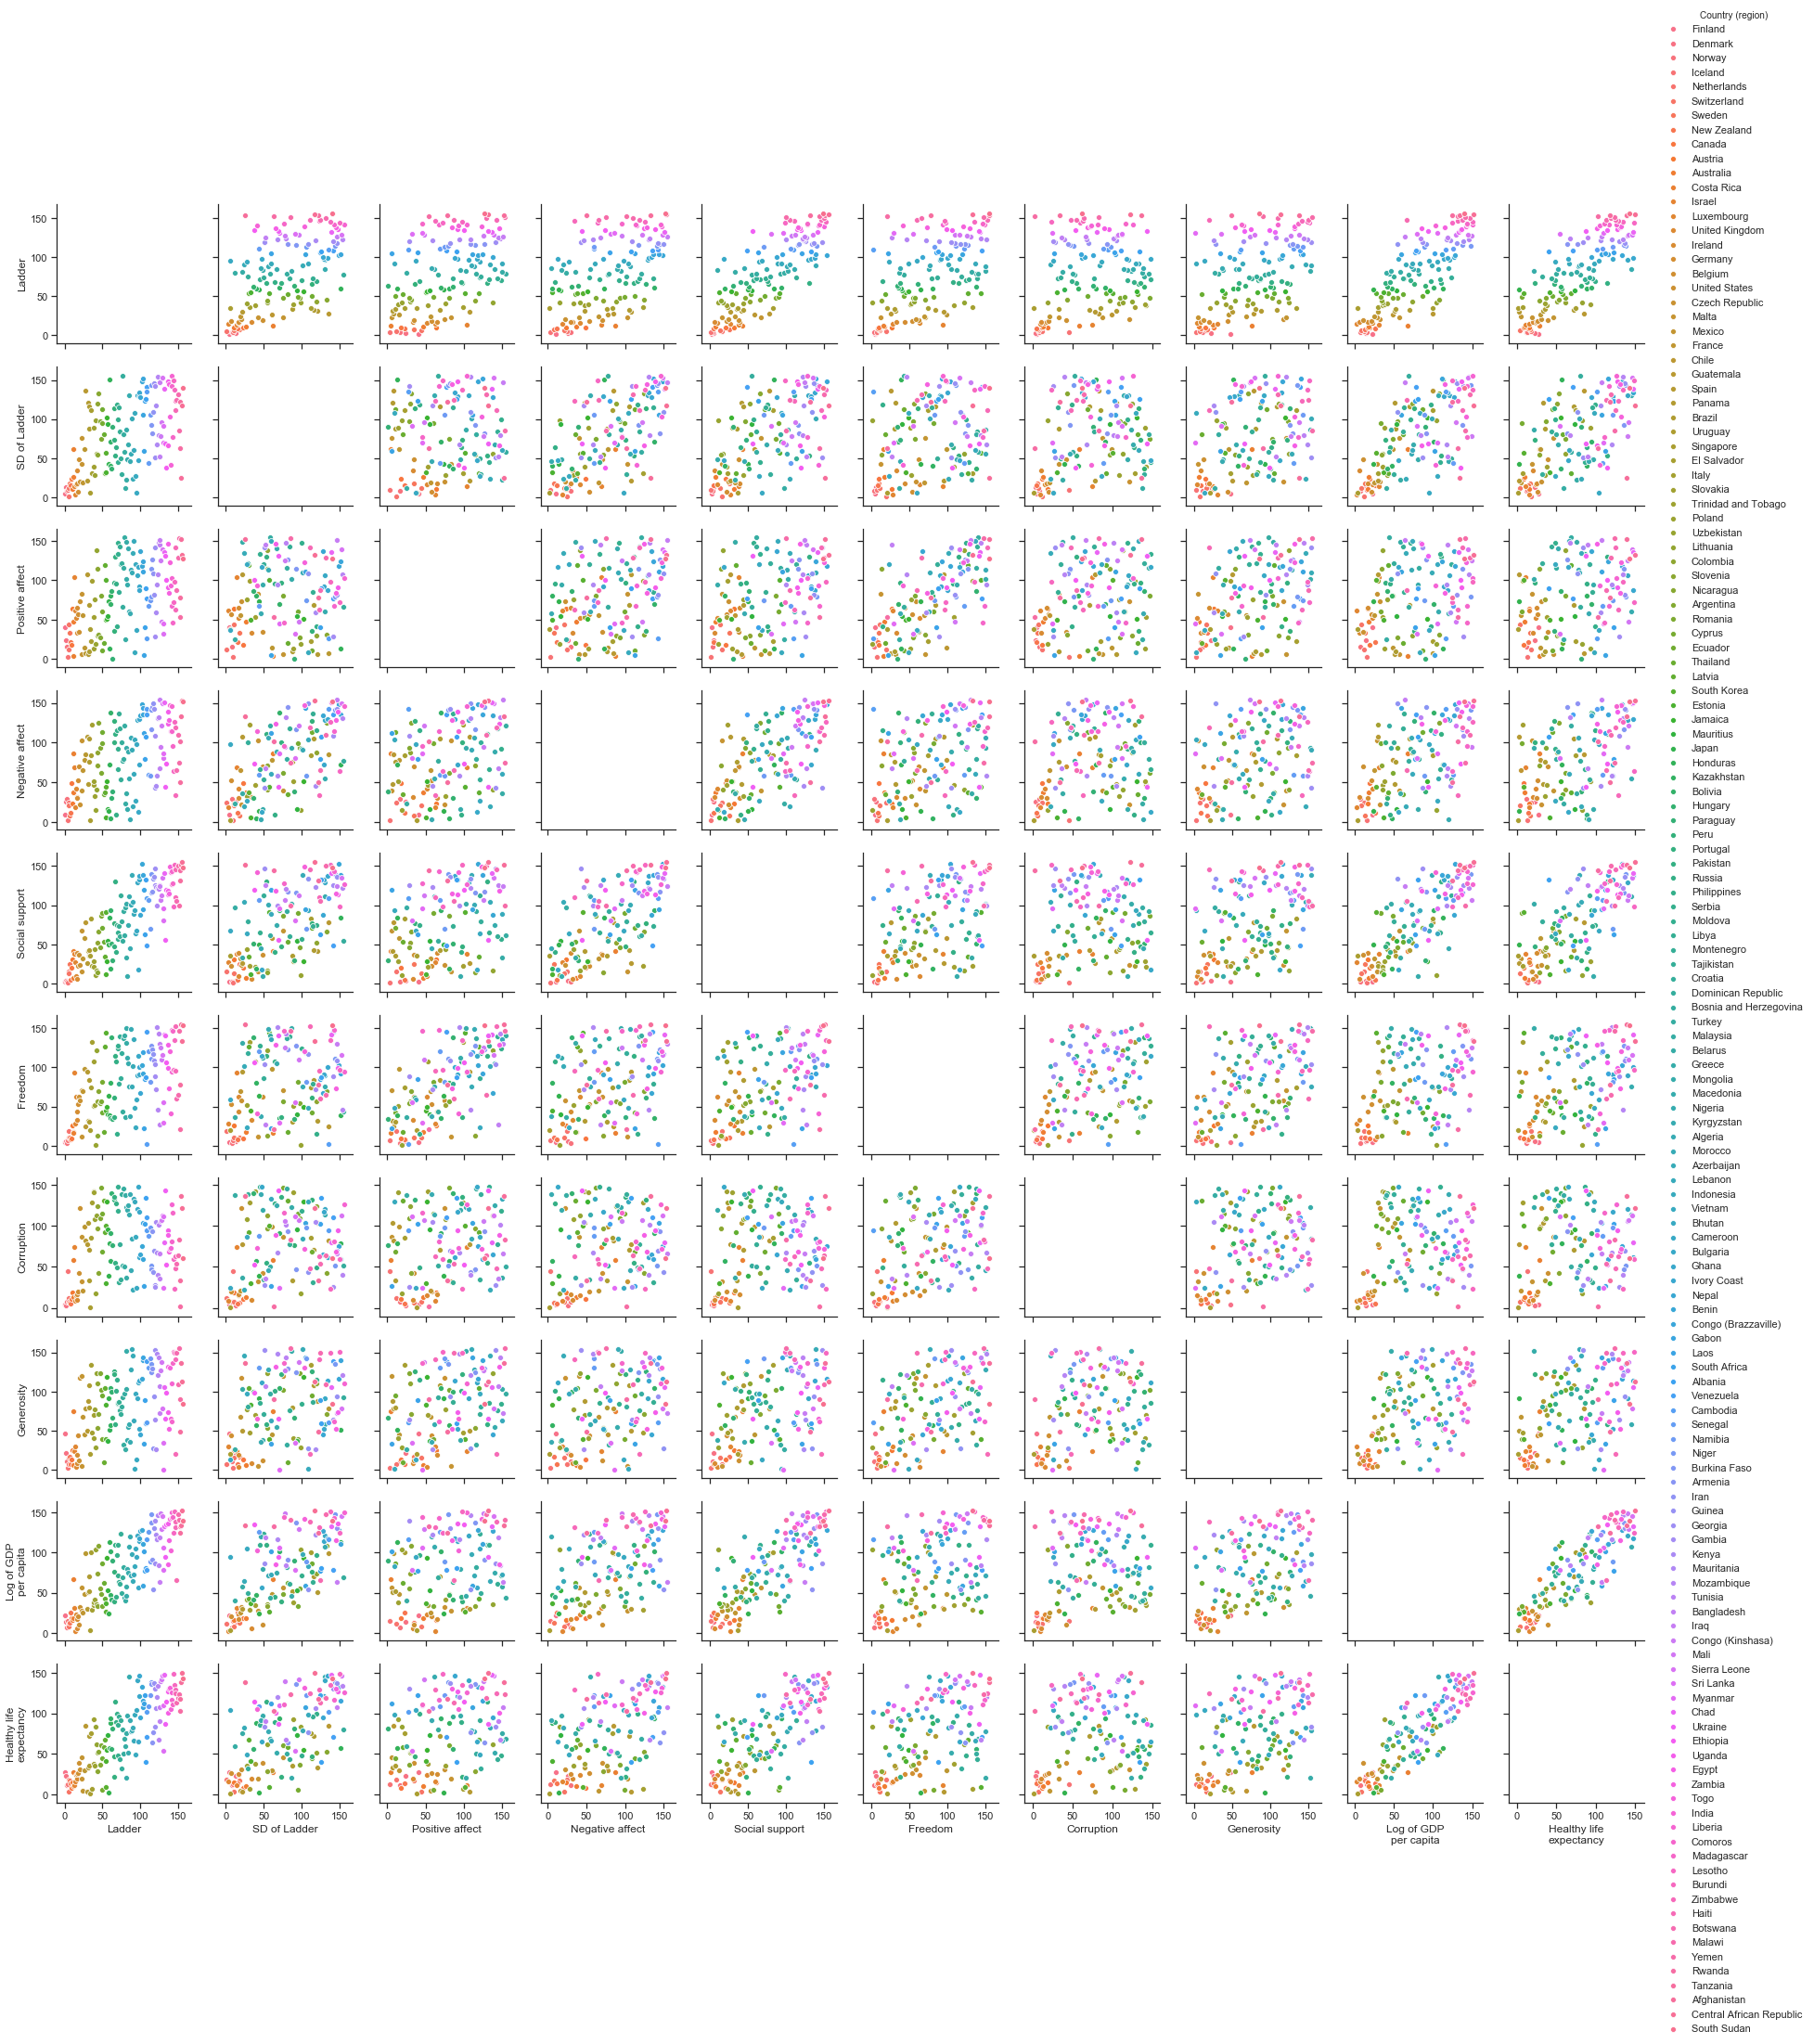

In [35]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data=df.dropna(), hue='Country (region)')
plt.show()

### Исходя из визуального анализа, классы (страны) разделимы. Похожими являются страны с одинаковым уронем жизни населения, т.е. с близким значением ВВП на душу населения в стране.

Посчитать матрицу корреляций для таблицы. Написать код. Сделать график. Какие можно сделать выводы?

<function matplotlib.pyplot.show(*args, **kw)>

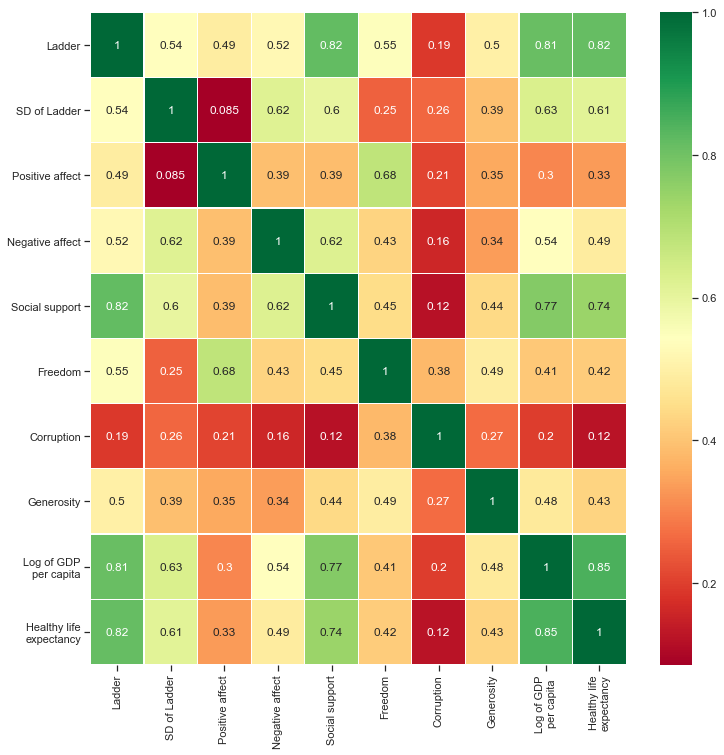

In [36]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show

### Матрица корреляций показывает, что наибольшая зависимость наблюдается между показателями Уровень удовлетворенности жизнью и Продолжительность жизни, Уровень удовлетворенности жизнью и ВВП на душу населения, ВВП и Продолжительность жизни, Соц. поддержка и продолжительность жизни, Соц.поддержка и ВВП. 

**Регрессионный анализ** - можно ли провести линейную зависимость между двумя выборками. Возьмем Ladder - удовлетворение жизнью, и generosity - доброта. Мы хотим найти прямую, которая разделит точки в пространстве наполовину. Это можно сделать графически. Нарисовать график. Можно ли сказать, что данная прямая является собственным вектором? При проецировании данных на эту прямую разброс данных максимален?

In [38]:
data_short = data[['Ladder', 'Generosity']].dropna()
print(data_short.shape)

(155, 2)


In [39]:
from sklearn.linear_model import LinearRegression
Ladder = data_short['Ladder']
Generosity = data_short['Generosity']
print(len(Ladder), len(Generosity))
model = LinearRegression()
result = model.fit(np.array(Ladder).reshape(-1,1), Generosity)
#model.fit(list(Ladder), Generosity)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

155 155
intercept: 38.98367263079239
slope: [0.49500947]


(155, 2)
[1.49785587 0.50214413]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Собственное значение:  1.5 Собственный вектор:  [0.70710678 0.70710678]
Собственное значение:  0.5 Собственный вектор:  [-0.70710678  0.70710678]


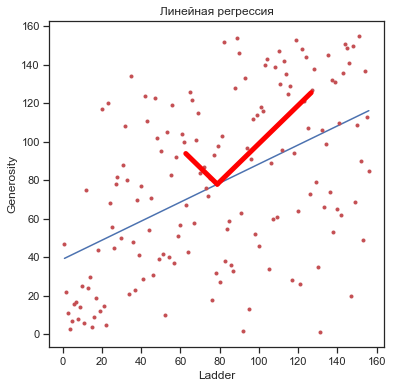

In [40]:
plt.figure(figsize=(6, 6))
plt.xlabel('Ladder')
plt.ylabel('Generosity')
plt.title('Линейная регрессия')
x = np.linspace(min(Ladder), max(Ladder), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(Ladder, Generosity, 'r.')

import numpy.linalg as la
import math
import statistics
from sklearn.preprocessing import StandardScaler
mean1 = statistics.mean(Ladder)
var1 = statistics.stdev(Ladder)
Ladder_std = (Ladder - mean1) / var1
mean2 = statistics.mean(Generosity)
var2 = statistics.stdev(Generosity)
Generosity_std = (Generosity - mean2) / var2
Y = np.vstack((Ladder_std, Generosity_std)).T
print(Y.shape)
w, v = la.eig(np.cov(Y.T))
print(w)
print(v)
for i in range(len(w)):
    #plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    #plt.plot(Ladder, Generosity, 'r.', zorder=1)
    print('Собственное значение: ', round(w[i],2), 'Собственный вектор: ', v[:,i])
    plt.xlabel('Ladder')
    plt.ylabel('Generosity')
    plt.plot([mean1, mean1+w[i]*v[:,i][0] * var1], 
             [mean2, mean2 +w[i] * v[:,i][1] * var2],
             color='red', linewidth=5)
plt.show()

# Дискретное распределение случайной величины

Напишите код для моделирования 10 подбрасываний игрального кубика. Начертите диаграму histogram. Какое это распределение?

Напишите код для моделирования 1000 подбрасываний игрального кубика. Начертите диаграму histogram. Почему график изменился? Как применить центральную предельную теорему?

### Из формулировки задания не понятно, что именно является случайной величиной, которую необходимо смоделировать. Поэтому для применения ЦПТ будем моделировать случайную величину, которая является суммой выпадающих значений на гранях кубика. Для этого проведем 100 испытаний, в каждом из которых кубик будет подбрасываться 10 раз. Поскольку мы знаем, что вероятность выпадения одной грани равна 1/6, то теоретическое среднее значение суммы по итогам 10 бросков будет равно 21 (сумма граней)/6х10=35

Trials = 100 times
Mean = 36.21
Standard deviation = 5.6873456022998985


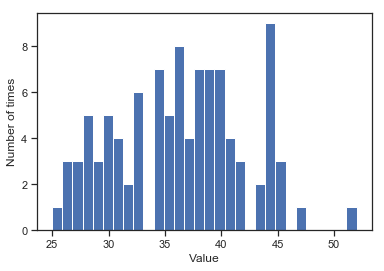

In [43]:
import pylab
import random

number_of_trials = 100 #общее количество испытаний
number_of_drops = 10 #бросков в одном испытаний
list_of_values = []
for i in range(number_of_trials):
    sum = 0
    for i in range(number_of_drops):
        sum += random.randint(1, 6)
    list_of_values.append(sum)

print ('Trials =', number_of_trials, 'times')
print ('Mean =', pylab.mean(list_of_values))
print ('Standard deviation =', pylab.std(list_of_values))

pylab.hist(list_of_values, bins=30)
pylab.xlabel('Value')
pylab.ylabel('Number of times')
pylab.show()

Trials = 100 times
Mean = 3504.73
Standard deviation = 57.0644994720886


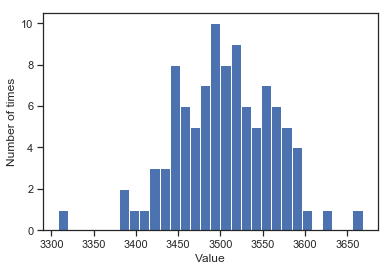

In [44]:
import pylab
import random

number_of_trials = 100 #общее количество испытаний
number_of_drops = 1000 #бросков в одном испытаний
list_of_values = []
for i in range(number_of_trials):
    sum = 0
    for i in range(number_of_drops):
        sum += random.randint(1, 6)
    list_of_values.append(sum)

print ('Trials =', number_of_trials, 'times')
print ('Mean =', pylab.mean(list_of_values))
print ('Standard deviation =', pylab.std(list_of_values))

pylab.hist(list_of_values, bins=30)
pylab.xlabel('Value')
pylab.ylabel('Number of times')
pylab.show()

### Для того, чтобы можно было полностью применить смысл центральной предельной теоремы, логично увеличить количество испытаний, оставляя при этом количество бросков в одном испытании равном 10. В этом случае по мере роста количества испытаний получаемое нами распределение суммы внутри одного испытания будет стремиться к нормальному распределению со средним значением, равном теоретическому среднему=35. Возьмем для примера 1000000 испытаний.

Trials = 1000000 times
Mean = 35.009384
Standard deviation = 5.396774401486874


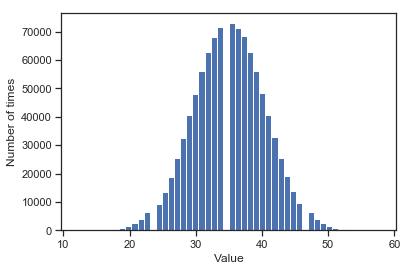

Wall time: 26.7 s


In [45]:
%%time
import pylab
import random

number_of_trials = 1000000 #общее количество испытаний
number_of_drops = 10 #бросков в одном испытаний
list_of_values = []
for i in range(number_of_trials):
    sum = 0
    for i in range(number_of_drops):
        sum += random.randint(1, 6)
    list_of_values.append(sum)

print ('Trials =', number_of_trials, 'times')
print ('Mean =', pylab.mean(list_of_values))
print ('Standard deviation =', pylab.std(list_of_values))

pylab.hist(list_of_values, bins=50)
pylab.xlabel('Value')
pylab.ylabel('Number of times')
pylab.show()